In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv('F:/DataScience/MLISEASY/data.csv')

In [4]:
df = df[['number_people','timestamp','day_of_week','is_weekend','is_holiday','temperature','is_start_of_semester']]

In [5]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester
0,37,61211,4,0,0,71.76,0
1,45,62414,4,0,0,71.76,0
2,40,63015,4,0,0,71.76,0
3,44,63616,4,0,0,71.76,0
4,45,64217,4,0,0,71.76,0


In [6]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000


In [26]:
# Let's find out the variance of individual independent features

print(df['timestamp'].var())
print(df['day_of_week'].var())
print(df['is_weekend'].var())
print(df['is_holiday'].var())
print(df['temperature'].var())
print(df['is_start_of_semester'].var())

586185880.2464374
3.987311063301503
0.20285790856340694
0.0025664300297276264
39.89686393534495
0.07261747678387935


In [7]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000


In [8]:
import matplotlib.pyplot as plt

In [54]:
%matplotlib inline

Text(0.5, 1.0, 'Correlation plot')

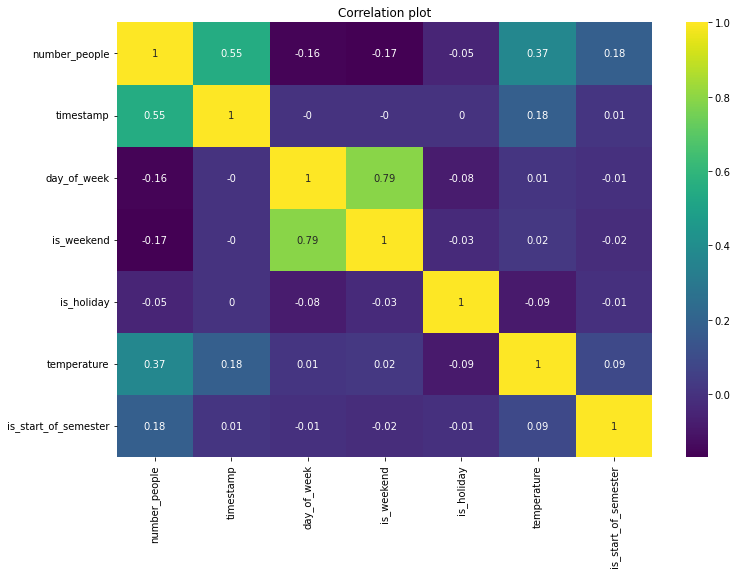

In [55]:
plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(round(df.corr(),2),annot=True,cmap='viridis')
plt.title('Correlation plot')

In [56]:
X = df.iloc[:,1:8]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only

In [57]:
# Let's findout the covariance of each independent features

print(np.cov(X))

MemoryError: Unable to allocate 28.8 GiB for an array with shape (62184, 62184) and data type float64

In [58]:
y

0        37
1        45
2        40
3        44
4        45
         ..
62179    23
62180    21
62181    25
62182    18
62183    23
Name: number_people, Length: 62184, dtype: int64

##### Standardizing the data

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scale = StandardScaler()

In [61]:
X_scaled = scale.fit_transform(X)

In [62]:
X_scaled

array([[ 0.63654993,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.68623792,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.71106127,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.96515979,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.99010704,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482]])

##### Let's apply PCA

In [63]:
from sklearn.decomposition import PCA

In [64]:
pcs = PCA(n_components=4)

In [65]:
pcs.fit_transform(X_scaled)

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929]])

##### Now let's findout the covariance between all PCs to know the variance of individual PCs and also the explained_variance to understand how much of the original data is covered by the PCs formed

In [66]:
pcs.get_covariance()

array([[ 0.90008618, -0.00526526,  0.00263007,  0.04899756,  0.30552184,
        -0.03401071],
       [-0.00526526,  1.14321497,  0.64862759, -0.06620001,  0.01767402,
        -0.01414391],
       [ 0.00263007,  0.64862759,  1.1422644 , -0.04138135,  0.01457873,
        -0.01443246],
       [ 0.04899756, -0.06620001, -0.04138135,  0.97915916, -0.14412206,
         0.00521061],
       [ 0.30552184,  0.01767402,  0.01457873, -0.14412206,  0.85434027,
         0.14583226],
       [-0.03401071, -0.01414391, -0.01443246,  0.00521061,  0.14583226,
         0.98103152]])

In [67]:
explained_variance_ratio = pcs.explained_variance_ratio_
explained_variance_ratio

array([0.30002086, 0.20478764, 0.16750837, 0.16320645])

##### Now let's understand with a plot howmuch data we have covered through our PCs

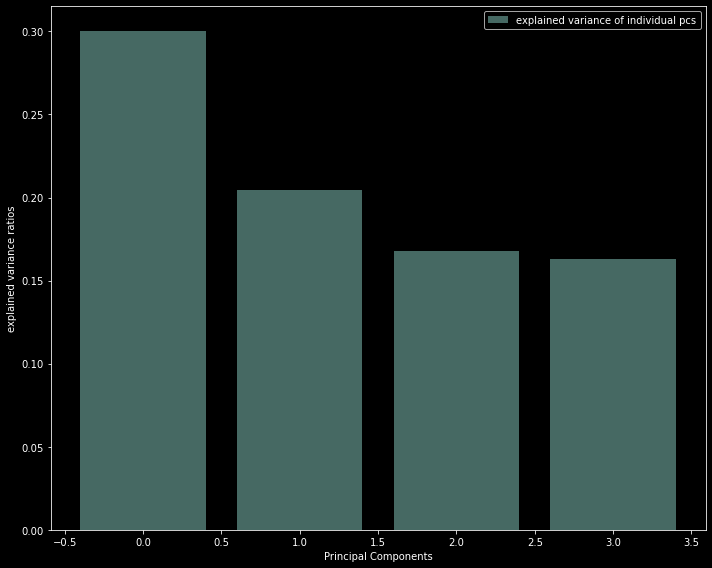

In [68]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,8))
    
    plt.bar(range(4),explained_variance_ratio,alpha=0.5,align='center',label='explained variance of individual pcs')
    plt.ylabel('explained variance ratios')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

##### Thus we can see from the above plot that first two components constitute almost 50% of the variance.Third,fourth components has 36% of the data sprad.So the PCs cover around 85-86% of the total data

In [73]:
# We can improve this by:

pcs = PCA(n_components=5)
X_new = pcs.fit_transform(X_scaled)

In [74]:
explained_variance_ratio=pcs.explained_variance_ratio_
explained_variance_ratio

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ])

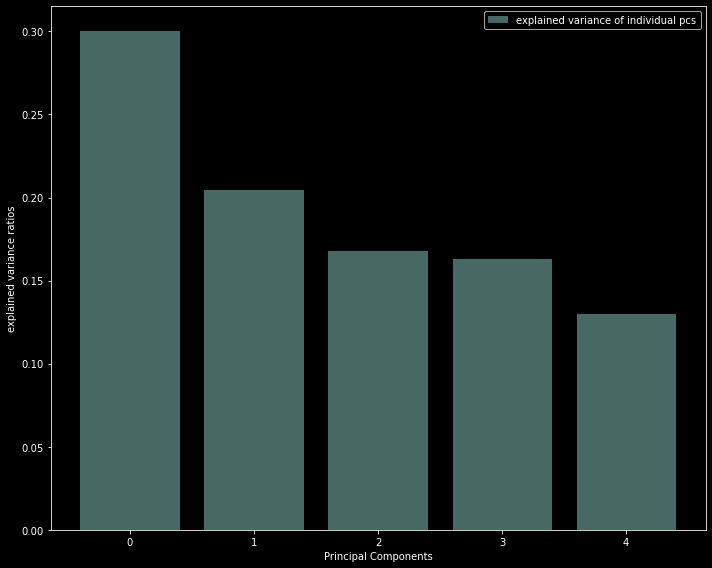

In [75]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,8))
    
    plt.bar(range(5),explained_variance_ratio,alpha=0.5,align='center',label='explained variance of individual pcs')
    plt.ylabel('explained variance ratios')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

##### Thus we can see from the above plot that first two components constitute almost 50% of the variance.Third,fourth and fifth components has 47% of the data sprad.So the PCs cover around 97% of the total data. Hence will consider 5 pcs for our data modelling